# Real time Sign to Text (Eng Sign Lang.)
### Sign Language MNIST
![png](eng_sign\sign_lang_tutorial.png)  
z와 j는 유사한 수어가 존재하고 움직이는 방식으로 구분하는거 같음

### 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image, ImageDraw
import tkinter as tk
import operator
import os
import glob

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Load

In [2]:
train = pd.read_csv("./eng_sign/sign_mnist_train.csv")
test = pd.read_csv("./eng_sign/sign_mnist_test.csv")

train.shape, test.shape

((27455, 785), (7172, 785))

In [3]:
display(train.sample(3))
display(test.sample(3))

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
2227,5,143,147,153,159,163,166,170,171,173,...,107,99,100,100,99,96,112,206,221,205
15930,4,160,160,159,161,161,161,160,159,159,...,185,188,188,185,184,184,182,180,179,177
4648,13,221,221,221,222,223,224,225,224,224,...,164,197,132,111,86,231,255,232,253,255


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
3840,24,157,159,162,162,163,164,165,165,166,...,193,192,189,189,188,187,186,185,183,181
2611,4,179,181,181,182,184,185,187,188,187,...,93,75,124,214,218,218,218,217,216,216
942,12,96,101,108,116,134,150,159,167,174,...,115,94,217,250,244,248,249,250,251,251


### Label

In [3]:
labels = train["label"].values
unique_val = np.array(labels)

In [5]:
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

J와 Z는 해당 데이터셋에 존재하지 않음

### Data Distribution

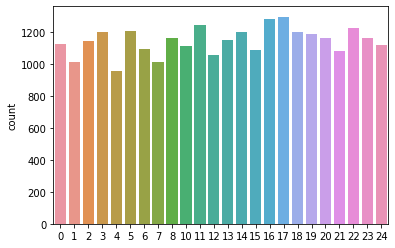

In [6]:
_ = sns.countplot(x=labels)

### Data Preprocessing

In [4]:
train.drop(columns="label", axis=1, inplace=True)

In [11]:
imgs = train.values
imgs = np.array([np.reshape(i, (28, 28)) for i in imgs]) # 28 by 28로 사이즈 변경
imgs = np.array([i.flatten() for i in imgs])

In [6]:
# 라벨 인코딩
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

### Display Images (Data)

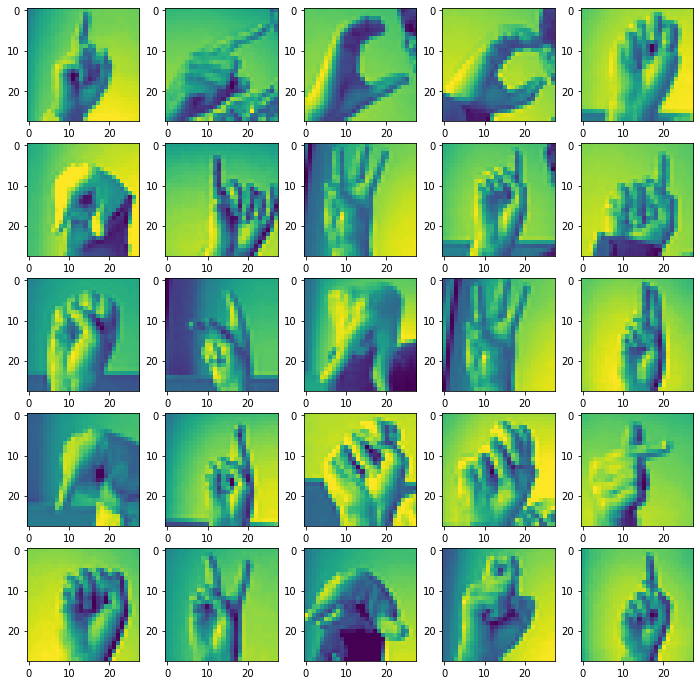

In [10]:
plt.figure(figsize=(12, 12))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(imgs[idx].reshape(28, 28))

In [11]:
# # openCV로 확인
# for idx in range(25):
#     rand = np.random.randint(0, len(imgs))
#     sample_img = imgs[rand]
#     sample_img = sample_img.reshape(28, 28).astype(np.uint8)
#     sample_img = cv2.resize(sample_img, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
#     cv2.imshow("Sample", sample_img)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()

### Data Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.2)

print(f"x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}")

x_train: (21964, 784)
y_train: (21964, 24)
x_test: (5491, 784)
y_test: (5491, 24)


In [13]:
x_train = x_train/255
x_test = x_test/255

### Data Augmentation

### Modeling

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [15]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         # rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         # horizontal_flip=False,  # randomly flip images
#         # vertical_flip=False  # randomly flip images
# )


# datagen.fit(x_train)

In [16]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))

In [17]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [18]:
# model.summary()

In [19]:
early_stopping = EarlyStopping(monitor="val_accuracy", mode="max", verbose=0, patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

In [20]:
# with tf.device("/device:GPU:0"):
#     history = model.fit(datagen.flow(x_train, y_train, batch_size=200), epochs=50, validation_data=(x_test, y_test), callbacks=[early_stopping, learning_rate_reduction], verbose=1)

In [21]:
with tf.device("/device:GPU:0"):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128, verbose=1, callbacks=[early_stopping])

Epoch 1/50
172/172 [==============================] - 6s 16ms/step - loss: 1.8222 - accuracy: 0.4408 - val_loss: 0.4805 - val_accuracy: 0.8428
Epoch 2/50
172/172 [==============================] - 5s 28ms/step - loss: 0.2936 - accuracy: 0.9027 - val_loss: 0.0825 - val_accuracy: 0.9831
Epoch 3/50
172/172 [==============================] - 4s 26ms/step - loss: 0.0820 - accuracy: 0.9760 - val_loss: 0.0258 - val_accuracy: 0.9942
Epoch 4/50
172/172 [==============================] - 3s 19ms/step - loss: 0.0360 - accuracy: 0.9902 - val_loss: 0.0071 - val_accuracy: 0.9987
Epoch 5/50
172/172 [==============================] - 4s 22ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 0.0094 - val_accuracy: 0.9978
Epoch 6/50
172/172 [==============================] - 5s 27ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 9.6805e-04 - val_accuracy: 1.0000
Epoch 7/50
172/172 [==============================] - 4s 24ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0013 - val_accuracy: 0.

In [22]:
model.save("eng_sign_lang_cnn_model.h5")

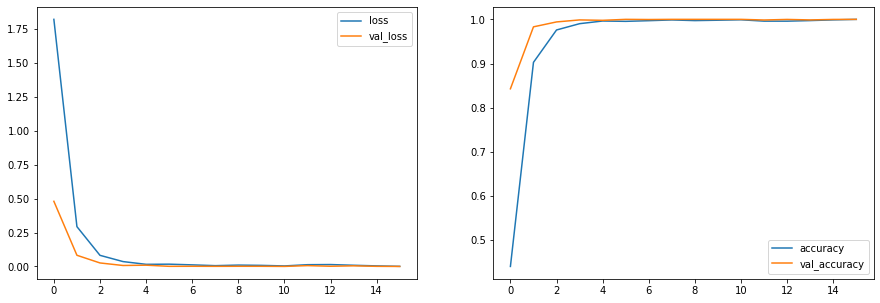

In [23]:
df_hist = pd.DataFrame(history.history)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
_ = df_hist[["loss", "val_loss"]].plot(ax=ax[0])
_ = df_hist[["accuracy", "val_accuracy"]].plot(ax=ax[1])

### Evaluation

In [24]:
test_labels = test["label"]
test.drop(columns="label", axis=1, inplace=True)

test_img = test.values
test_img = np.array([np.reshape(i, (28, 28)) for i in test_img])
test_img = np.array([i.flatten() for i in test_img])

test_labels = label_binrizer.transform(test_labels)

test_img = test_img.reshape(test_img.shape[0], 28, 28, 1)

y_pred = model.predict(test_img)

In [25]:
accuracy_score(test_labels, y_pred.round())

0.9213608477412158

### Matching func.

In [4]:
alpha = [chr(x).upper() for x in range(97, 123)]
alpha.remove("J")
alpha.remove("Z")
idx = [x for x in range(0, 24)]

In [5]:
def convert_letter(result):
    classLabels = {idx:c for idx, c in zip(idx, alpha)}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "err"

In [15]:
convert_letter(np.argmax(model.predict(test_img[4].reshape(1, 28, 28, 1))))

NameError: name 'model' is not defined

### Test on Real Time

In [28]:
model = tf.keras.models.load_model("./eng_sign_lang_cnn_model.h5")

In [2]:
model = tf.keras.models.load_model("../선은지/ej_model.h5")

In [45]:
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    
    roi = frame[100:400, 320:620]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # roi = cv2.GaussianBlur(roi, (0, 0), 1)
    roi = cv2.Sobel(roi, -1, 1, 0, delta=128)
    # roi = cv2.Canny(roi, 60, 90)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    # cv2.imshow("roi", roi)
    roi = roi.reshape(1, 28, 28, 1)
    
    result = convert_letter(np.argmax(model.predict(roi)))
    # result = str(model.predict_classes(roi, 1, verbose=0)[0])
    
    cv2.putText(frame, result, (300, 100), cv2.FONT_HERSHEY_DUPLEX, 2, (255, 0, 0), 2)
    cv2.rectangle(frame, pt1=(320, 100), pt2=(620, 400), color=(255, 0, 0), thickness=3)
    # frame = cv2.Canny(frame, 60, 90)
    # frame = cv2.GaussianBlur(frame, (0, 0), 1)
    frame = cv2.Sobel(frame, -1, 1, 0, delta=128)
    cv2.imshow("Sign Translator", frame)
    
    if cv2.waitKey(1)==ord("q"): break
    
cap.release()
cv2.destroyAllWindows()